In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

In [35]:
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

covid_worldwide_df = pd.read_csv(COVID_CONFIRMED_URL)

covid_worldwide_df['Province/State'].fillna('', inplace=True)
covid_worldwide_df['Country/Region'].fillna('', inplace=True)

covid_worldwide_df.info() 
covid_worldwide_df.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 185 entries, Province/State to 7/20/20
dtypes: float64(2), int64(181), object(2)
memory usage: 384.6+ KB


0

In [36]:
covid_confirmed_long = pd.melt(covid_worldwide_df,
                               id_vars=covid_worldwide_df.iloc[:, :4],
                               var_name='date',
                               value_name='confirmed')
covid_confirmed_long.shape
covid_confirmed_long.head()

,Province/State,Country/Region,Lat,Long,date,confirmed
0,,Afghanistan,33.93911,67.709953,1/22/20,0
1,,Albania,41.15330,20.168300,1/22/20,0
2,,Algeria,28.03390,1.659600,1/22/20,0
3,,Andorra,42.50630,1.521800,1/22/20,0
4,,Angola,-11.20270,17.873900,1/22/20,0


In [37]:
## For linear regression data ## 

## Use the US for our prediction, and narrow down to the US to test our regression model. ## 

# Group by the country, date and drop coordinates

covid_us_df = covid_confirmed_long.groupby(['Country/Region', 'date'], sort=False).sum().reset_index()
covid_us_df.drop(['Lat', 'Long'], axis=1)

covid_us_df = covid_us_df[covid_us_df['Country/Region']=='US']

covid_us_df.tail()

,Country/Region,date,Lat,Long,confirmed
33244,US,7/16/20,40.0,-100.0,3576157
33432,US,7/17/20,40.0,-100.0,3647715
33620,US,7/18/20,40.0,-100.0,3711413
33808,US,7/19/20,40.0,-100.0,3773260
33996,US,7/20/20,40.0,-100.0,3830010


In [38]:
days = np.array([
    row for row in range(len(covid_us_df['date']))])

days = days.reshape(-1, 1)
#days

In [39]:
covid_us_confirmed = list(covid_us_df['confirmed'][90:])
#covid_us_confirmed

In [40]:
x = days[90:].reshape(-1,1)
y = list(np.log(covid_us_confirmed))

#x

In [41]:
## Train, Test, Split ## 

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.1,
                                                    shuffle=False)

In [42]:
## Fitting ## 

linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(x_train, y_train)

LinearRegression()

In [43]:
## Testing prediction ## 

y_pred = linear_model.predict(x_test)

y_pred

array([14.97444514, 14.98927275, 15.00410035, 15.01892796, 15.03375556,
       15.04858317, 15.06341077, 15.07823838, 15.09306599, 15.10789359])

In [44]:
print('MAE:', mean_absolute_error(y_pred, y_test))
print('MSE:',mean_squared_error(y_pred, y_test))

## Very low mean absolute & mean squared error. 
#Strong averages and tight data prediction! Continuing to the correlation coefficient and molding slope-intercept form.#

MAE: 0.03654860104899331
MSE: 0.001475143981117409


In [45]:
a = linear_model.coef_
b = linear_model.intercept_

In [46]:
# To see how COVID will be predicted in daily cases up to winter, we will take the number of days added to the range
# Current date - 7/21/2020 
# Projected date - 12/21/2020, Winter Solstice, 153 Days. 
# We will forecast 185 to account for the first month of winter 

x_forecast = list(np.arange(len(days), len(days) + 185))
# x_forecast

In [47]:
# Linear regression equation y=mx+b. 
y_forecast = [(a*x+b)[0] for x in x_forecast]
# y_forecast

In [48]:
y_train_l = list(np.exp(y_train))
y_test_l = list(np.exp(y_test))
y_pred_l = list(np.exp(y_pred))
y_fore_l = list(np.exp(y_forecast))

# y_train_l, y_test_l, y_pred_l, y_fore_l

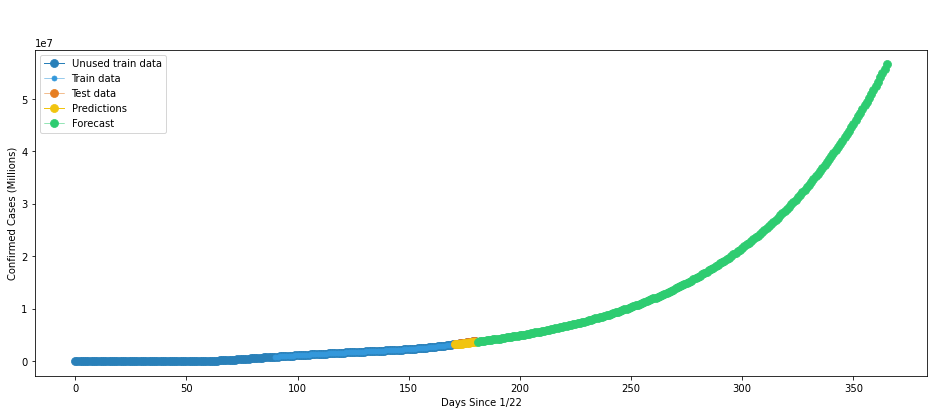

In [49]:
## Building a plot to visualize the prediction of daily cases of COVID-19 in the US toward Winter 
## 180 days since 1/22 will be 7/22. From 7/22, 120 days to 11/22 will show COVID-19's projected impact with confirmed cases in winter. 
## The impact is seen to be exponential according to this model

fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=days.reshape(-1), y=covid_us_df['confirmed'],
             markeredgecolor="#2980b9", markerfacecolor="#2980b9", markersize=8, marker="o",
             sort=False, linewidth=1, color="#2980b9")

sns.lineplot(x=x_train.reshape(-1), y=y_train_l,
             markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=5, marker="o",
             sort=False, linewidth=.5, color="#3498db")

sns.lineplot(x=x_test.reshape(-1), y=y_test_l,
             markeredgecolor="#e67e22", markerfacecolor="#e67e22", markersize=8, marker="o",
             sort=False, linewidth=.5, color="#e67e22")

sns.lineplot(x=x_test.reshape(-1), y=y_pred_l,
             markeredgecolor="#f1c40f", markerfacecolor="#f1c40f", markersize=8, marker="o",
             sort=False, linewidth=1, color="#f1c40f")

sns.lineplot(x=x_forecast, y=y_fore_l,
             markeredgecolor="#2ecc71", markerfacecolor="#2ecc71", markersize=8, marker="o",
             sort=False, linewidth=.5, color="#2ecc71")

plt.suptitle("COVID-19 Confirmed Cases and Forecasting in the United States", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Confirmed Cases (Millions)')
plt.xlabel('Days Since 1/22')

plt.legend(['Unused train data', 'Train data', 'Test data', 'Predictions', 'Forecast'])
plt.savefig('reg.svg', format='svg', dpi=1200)
plt.show()

## Conclusion

* As we are able to infer, the prediction model shows in days past that there was a slow rise of daily cases and a potential to continue the trend upward. The forecast is exponential, likely to climb past 5 million cases within reaching the winter solstice on 12/21/2020 (360 days from the beginning of our data on 1/21/2020). Toward 6 million cases are forecasted within the first 30 days of Winter.

**_We may confirm the virus will accelerate spread based upon our forecast model_**